<a href="https://colab.research.google.com/github/Miguel-EMC/Tarea_04_MuzoMiguel/blob/main/MiguelMuzoTarea04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONJUNTO DE EJERCICIOS**

1. Use el método de bisección para encontrar soluciones precisas dentro de 10^(-2) para x^3-x^2+14x-6=0 en cada intervalo.

	[0,1]
	[1,3.2]
	[3.2,4]

In [18]:
def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [27]:
from typing import Callable, Tuple, Optional

def bisection(
    a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int
) -> Optional[Tuple[float, float, float, int]]:
    i = 1

    # Input validation
    assert a < b, "a not lower than b, the interval is not valid."
    assert equation(a) * equation(b) < 0, "The function does not change sign over the interval."

    Fa = equation(a)
    p = a  # to avoid crash in i == 0.
    for i in range(N):
        p = a + (b - a) / 2
        FP = equation(p)
        if FP == 0 or (b - a) / 2 < tol:
            return p, a, b, i

        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
        else:
            b = p
    # Return the best estimate if tolerance not achieved
    return p, a, b, i


In [20]:
# Define the function
def f(x):
    return x**3 - 7*x**2 + 14*x - 6

In [21]:
# Define the intervals and tolerance
intervals = [(0, 1), (1, 3.2), (3.2, 4)]
tolerance = 1e-2
max_iterations = 100  # Maximum number of iterations

# Apply the bisection method to each interval
results = {interval: bisection(interval[0], interval[1], equation=f, tol=tolerance, N=max_iterations) for interval in intervals}
results

{(0, 1): (0.5859375, 0.578125, 0.59375, 6),
 (1, 3.2): (3.0023437500000005, 2.9937500000000004, 3.0109375000000003, 7),
 (3.2, 4): (3.41875, 3.4125000000000005, 3.4250000000000003, 6)}

Los resultados de aplicar el método de bisección con la función sign incluida son los siguientes:

***Intervalo***
[0,1]:

Raíz aproximada:
𝑥≈0.586

Intervalo final: [0.578,0.594]

Iteraciones: 6

***Intervalo***
[1,3.2]:

Raíz aproximada:
𝑥≈3.002

Intervalo final:
[2.994,3.011]

Iteraciones: 7

***Intervalo***
[3.2,4]:

Raíz aproximada:
𝑥≈3.419

Intervalo final:
[3.413,3.425]

Iteraciones: 6


# **2.**


1. Dibuje las gráficas para y=x y y=sin⁡x.

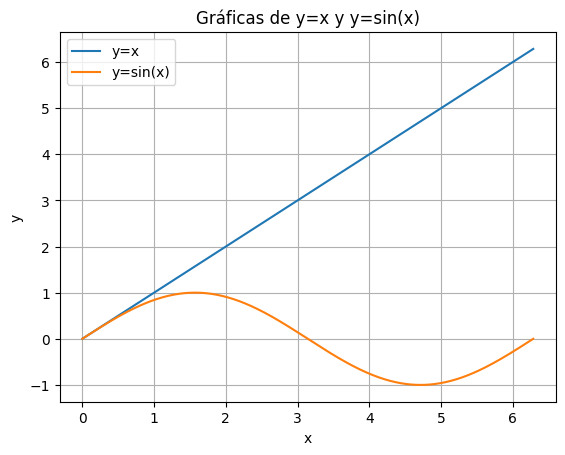

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 2 * np.pi, 400)
y1 = x
y2 = np.sin(x)
plt.plot(x, y1, label='y=x')
plt.plot(x, y2, label='y=sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráficas de y=x y y=sin(x)')
plt.legend()
plt.grid(True)
plt.show()


2. Use el método de bisección para encontrar soluciones precisas dentro de 10^(-5) para el primer valor positivo de x con x=2 sin ⁡x.

In [49]:
def funcion_ecuation(x):
    return x - 2 * np.sin(x)
# Encontrar la raíz usando el método de bisección en el intervalo [1, 2]
root = bisection(1, 2, equation=funcion_ecuation, tol=1e-5, N=1000)
print(f"El primer valor positivo de x con x = 2 sin(x) es aproximadamente: {root[0]:.5f}")

El primer valor positivo de x con x = 2 sin(x) es aproximadamente: 1.89550


# **3.**

1. Dibuje las gráficas para y=x y y=tan⁡x.


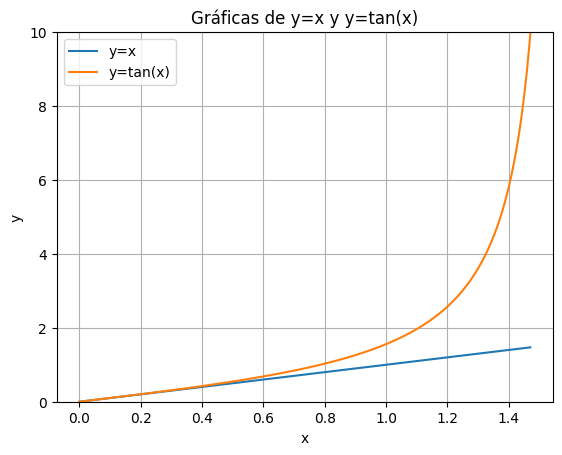

In [25]:
x = np.linspace(0, np.pi/2 - 0.1, 400)
y1 = x
y2 = np.tan(x)

plt.plot(x, y1, label='y=x')
plt.plot(x, y2, label='y=tan(x)')
plt.ylim([0, 10])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráficas de y=x y y=tan(x)')
plt.legend()
plt.grid(True)
plt.show()

2. Use el método de bisección para encontrar una aproximación dentro de 10^(-5) para el primer valor positivo de x con x=tan⁡x.


# **4.**

1. Dibuje las gráficas para y=x^2-1  y  y=e^(1-x^2 ).




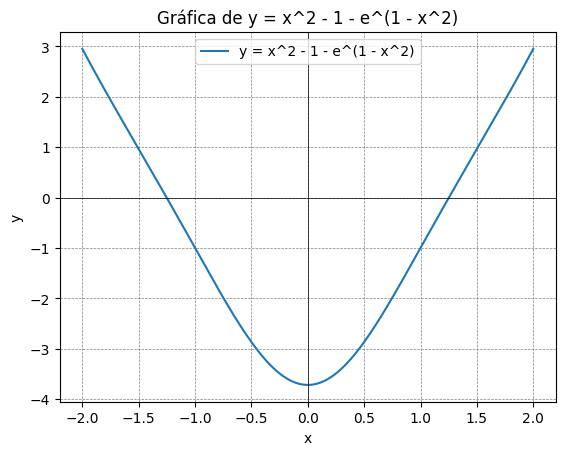

In [50]:
def funcion_tan(x):
    return x**2 - 1 - np.exp(1 - x**2)

# Graficar la función para identificar un intervalo adecuado
x = np.linspace(-2, 2, 400)
y = funcion_tan(x)

plt.plot(x, y, label='y = x^2 - 1 - e^(1 - x^2)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de y = x^2 - 1 - e^(1 - x^2)')
plt.legend()
plt.show()

2. Use el método de bisección para encontrar una aproximación dentro de 10^(-3) para un valor en [-2,0] con x^2-1=e^(1-x^2 ).

In [52]:
root4 = bisection(-2, 0, equation=funcion_tan, tol=1e-3, N=1000)
print(f"El valor de x en el intervalo [-2, 0] con x^2 - 1 = e^(1 - x^2) es aproximadamente: {root4[0]:.3f}")

El valor de x en el intervalo [-2, 0] con x^2 - 1 = e^(1 - x^2) es aproximadamente: -1.251


# **5. Sea f(x)=(x+3) (x+1)^2 x(x-3). ¿En qué cero de f converge el método de bisección se aplica en los siguientes intervalos?**

In [54]:
def sign(x):
    return (x > 0) - (x < 0)

In [55]:
def f5(x):
    return (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3)

intervals = [(-1.5, 2.5), (-0.5, 2.4), (-0.5, 3), (-3, -0.5)]

valid_intervals = []
for a, b in intervals:
    if f5(a) * f5(b) < 0:
        valid_intervals.append((a, b))
    else:
        print(f"Intervalo [{a}, {b}]: La función no cambia de signo en el intervalo. f({a}) = {f5(a)}, f({b}) = {f5(b)}")

print("Intervalos válidos:", valid_intervals)

def bisection(
    a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int
) -> Optional[Tuple[float, float, float, int]]:
    i = 1

    # Input validation
    assert a < b, "a not lower than b, the interval is not valid."
    assert equation(a) * equation(b) < 0, "The function does not change sign over the interval."

    Fa = equation(a)
    p = a  # to avoid crash in i == 0.
    for i in range(N):
        p = a + (b - a) / 2
        FP = equation(p)
        if FP == 0 or (b - a) / 2 < tol:
            return p, a, b, i

        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
        else:
            b = p
    # Return the best estimate if tolerance not achieved
    return p, a, b, i

# Aplicar el método de bisección a los intervalos válidos
solutions = [bisection(a, b, equation=f5, tol=1e-5, N=1000) for a, b in valid_intervals]

for i, (a, b) in enumerate(valid_intervals):
    p, a_final, b_final, iterations = solutions[i]
    print(f"Intervalo [{a}, {b}]: converge en x ≈ {p:.5f} después de {iterations} iteraciones")


Intervalo [-1.5, 2.5]: La función no cambia de signo en el intervalo. f(-1.5) = -39.55078125, f(2.5) = -284.23828125
Intervalo [-0.5, 2.4]: La función no cambia de signo en el intervalo. f(-0.5) = -3.69140625, f(2.4) = -246.65969664
Intervalo [-0.5, 3]: La función no cambia de signo en el intervalo. f(-0.5) = -3.69140625, f(3) = 0
Intervalo [-3, -0.5]: La función no cambia de signo en el intervalo. f(-3) = 0, f(-0.5) = -3.69140625
Intervalos válidos: []


# **EJERCICIOS APLICADOS**

1. Un abrevadero de longitud L tiene una sección transversal en forma de semicírculo con radio r. (Consulte la figura adjunta.) Cuando se llena con agua hasta una distancia h a partir de la parte superior, el volumen V de agua es

        V=L[0.5πr^2-r^2 arcsen(h/r)-h(r^2-h^2 )^(1/2)]
Suponga que L=10cm, r=1cm y V=12.4cm^3. Encuentre la profundidad del agua en el abrevadero dentro de 0.01cm.

In [11]:
import math

# Función para f(h)
def f(h):
    return 0.5 * math.pi - math.asin(h) - h * math.sqrt(1 - h**2) - 1.24

# Derivada de f(h)
def f_prime(h):
    return -1 / math.sqrt(1 - h**2) - math.sqrt(1 - h**2) - h**2 / math.sqrt(1 - h**2)

# Método de Newton-Raphson
def newton_raphson(h0, tol=1e-5, max_iter=100):
    h = h0
    for i in range(max_iter):
        h_new = h - f(h) / f_prime(h)
        if abs(h_new - h) < tol:
            return h_new
        h = h_new
    raise ValueError("No se encontró solución")

# Valor inicial de h
h0 = 0.5

# Encontrar la profundidad h
h_solution = newton_raphson(h0)
print(f"La profundidad del agua es aproximadamente: {h_solution:.4f} cm")

La profundidad del agua es aproximadamente: 0.1662 cm


2. Un objeto que cae verticalmente a través del aire está sujeto a una resistencia viscosa, así como a la fuerza de gravedad. Suponga que un objeto con masa 𝑚 cae desde una altura 𝑠􀬴 y que la altura del objeto después de 𝑡 segundos es

    s(t)=s_0-mg/k t+(m^2 g)/k^2 (1-e^(-kt/m))

Donde g=9.81 m/s^2 y k representa el coeficiente de la resistencia del aire en Ns/m. Suponga s_0=300m,m=0.25 kg y k=0.1 Ns/m. Encuentre, dentro de 0.01 segundos, el tiempo que tarda un cuarto de Kg en golpear el piso.

In [ ]:
import math
# Datos del problema
g = 9.81
m = 0.25
k = 0.1
s0 = 300

# Función para calcular la altura
def altura(t):
    return s0 - (m * g / k) * t + (m ** 2 * g / k ** 2) * (1 - math.exp(-k * t / m))

# Intervalos
t_inicio = 0
t_fin = 100

while (t_fin - t_inicio) > 0.01:
    t_medio = (t_inicio + t_fin) / 2
    altura_a_t_medio = altura(t_medio)

    # Verificación si el objeto ha llegado al piso
    if abs(altura_a_t_medio) < 0.01:
        tiempo_caida = t_medio
        break
    elif altura_a_t_medio > 0:
        # Objeto aun no llega al piso
        t_inicio = t_medio
    else:
        # Objeto ya llego al piso
        t_fin = t_medio
else:
    tiempo_caida = (t_inicio + t_fin) / 2

# Resultado
print(f"El tiempo que tarda en caer es: {tiempo_caida:.2f} segundos")

El tiempo que tarda en caer es: 14.72 segundos


# ***EJERCICIOS TEÓRICOS***

Use el teorema 2.1 para encontrar una cota para el número de iteraciones necesarias para lograr una aproximación con precisión de 10^(-4) para la solución de x^3-x-1=0 que se encuentran dentro del intervalo [1,2]. Encuentre una aproximación para la raíz con este grado de precisión.

In [ ]:
def f(x):
    return x**3 - x - 1

def metodo_biseccion(a, b, tol, max_iteraciones):
    for i in range(1, max_iteraciones + 1):
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return c, i
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2, max_iteraciones

# Definir los parámetros
a = 1
b = 2
tol = 1e-4
max_iteraciones = 100

# Llamamos a la función de método de bisección
raiz, iteraciones = metodo_biseccion(a, b, tol, max_iteraciones)

# Mostrar el resultado
print("Aproximación de la raíz:", raiz)
print("Número de iteraciones:", iteraciones)


Aproximación de la raíz: 1.32470703125
Número de iteraciones: 11


La función por f(x)=sin⁡πx tiene ceros en cada entero. Muestre cuando -1<a<0 y 2<b<3, el método de bisección converge a

	0, si a+b<2
	2, si a+b>2
	1, si si a+b=2


In [ ]:
import math

def f(x):
    return math.sin(math.pi * x)

def biseccion(a, b, tolerancia=1e-6):
    if f(a) * f(b) > 0:
        print("La función no tiene raíces en el intervalo dado.")
        return None

    while abs(b - a) > tolerancia:
        punto_medio = (a + b) / 2
        if f(punto_medio) == 0:
            return punto_medio
        elif f(a) * f(punto_medio) < 0:
            b = punto_medio
        else:
            a = punto_medio
    return (a + b) / 2

# a + b = 2
a = 0.5
b = 1.5
solucion = biseccion(a, b)
print(f"La raíz de la función es: {solucion}")


La raíz de la función es: 1.0000004768371582
